# Data Collection

In [1]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d joebeachcapital/nintendo-games
!unzip -q nintendo-games

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/nintendo-games
License(s): DbCL-1.0
  0% 0.00/36.3k [00:00<?, ?B/s]
100% 36.3k/36.3k [00:00<00:00, 35.4MB/s]


# Data Understanding

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
games_df = pd.read_csv('NintendoGames.csv')

games_df.head()

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario RPG,Switch,"Nov 17, 2023",NaN,/game/switch/super-mario-rpg,E,['Nintendo'],"['Role-Playing', 'Japanese-Style']"
1,NaN,WarioWare: Move It!,Switch,"Nov 3, 2023",NaN,/game/switch/warioware-move-it!,RP,['Intelligent Systems'],"['Miscellaneous', 'Party / Minigame']"
2,NaN,Super Mario Bros. Wonder,Switch,"Oct 20, 2023",NaN,/game/switch/super-mario-bros-wonder,E,['Nintendo'],"['Action', 'Platformer', '2D']"
3,NaN,Detective Pikachu Returns,Switch,"Oct 6, 2023",NaN,/game/switch/detective-pikachu-returns,NaN,['Creatures Inc.'],"['Adventure', '3D', 'Third-Person']"
4,NaN,Fae Farm,Switch,"Sep 8, 2023",NaN,/game/switch/fae-farm,E10+,['Phoenix Labs'],"['Simulation', 'Virtual', 'Virtual Life']"


In [4]:
print(f'Jumlah baris: {games_df.shape[0]}')
print(f'Jumlah kolom: {games_df.shape[1]}')

Jumlah baris: 1094
Jumlah kolom: 9


Berdasarkan data tersebut variabel-variabel pada Nintendo Games Dataset adalah sebagai berikut:



- Meta Score: Skor review dari kritikus profesional platform Metacritic (0-100)
- Title: Judul game Nintendo
- Platform: Platform atau konsol yang tersedia untuk game (NDS, 3DS, Switch dll)
- Release Date: Tanggal rilis resmi game
- User Score: Skor ulasan yang diberikan pengguna untuk game (0-10)
- Details Page Link: Tautan ke halaman detail game di situs Metacritic
- ESRB Rating: Rating ERSB (Entertainment Software Rating Board) yang menunjukkan tingkat kesesuaian usia pemain untuk game tersebut (misalnya E untuk Everyone, T untuk Teen, M untuk Mature, dll.)
- Developers: Nama pengembang game
- Genres: Genre atau kategori game (Action, Puzzle, dll)

In [5]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meta_score   709 non-null    float64
 1   title        1094 non-null   object 
 2   platform     1094 non-null   object 
 3   date         1094 non-null   object 
 4   user_score   856 non-null    float64
 5   link         1094 non-null   object 
 6   esrb_rating  972 non-null    object 
 7   developers   1091 non-null   object 
 8   genres       1094 non-null   object 
dtypes: float64(2), object(7)
memory usage: 77.0+ KB


In [6]:
games_df.describe()

,meta_score,user_score
count,709.000000,856.000000
mean,76.083216,7.671612
std,10.610735,1.031266
min,37.000000,3.100000
25%,69.000000,7.200000
50%,77.000000,7.900000
75%,83.000000,8.400000
max,99.000000,9.600000


# Exploratory Data Analysis

<ipython-input-7-67f7e65eda82>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  esrb_E = games_df.loc[games_df['esrb_rating'] == 'E'].count()[1]
<ipython-input-7-67f7e65eda82>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  esrb_T = games_df.loc[games_df['esrb_rating'] == 'T'].count()[1]
<ipython-input-7-67f7e65eda82>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  esrb_E10 = games_df.loc[games_df['esrb_rating'] == 'E10+'].count()

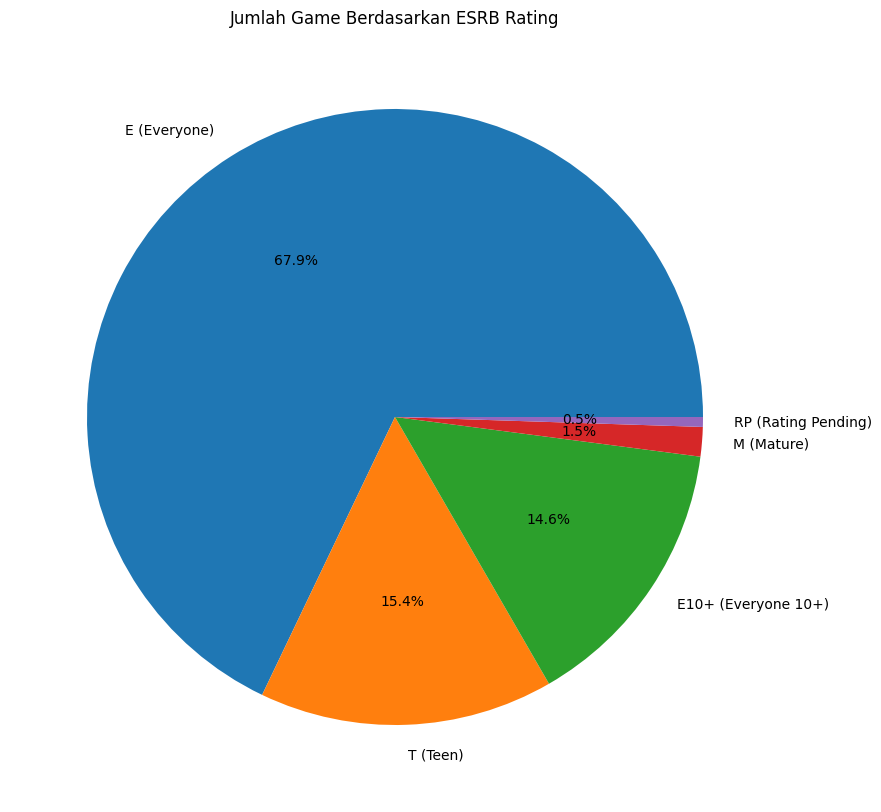

In [7]:
esrb_E = games_df.loc[games_df['esrb_rating'] == 'E'].count()[1]
esrb_T = games_df.loc[games_df['esrb_rating'] == 'T'].count()[1]
esrb_E10 = games_df.loc[games_df['esrb_rating'] == 'E10+'].count()[1]
esrb_M = games_df.loc[games_df['esrb_rating'] == 'M'].count()[1]
esrb_RP = games_df.loc[games_df['esrb_rating'] == 'RP'].count()[1]

labels = ['E (Everyone)', 'T (Teen)', 'E10+ (Everyone 10+)', 'M (Mature)', 'RP (Rating Pending)']
values = [esrb_E, esrb_T, esrb_E10, esrb_M, esrb_RP]

plt.figure(figsize=(15,10))
plt.title('Jumlah Game Berdasarkan ESRB Rating')
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()

Berdasarkan grafik diatas sebagian besar game di Nintendo memiliki rating E (Everyone) dengan presentase 67.9% dan yang paling terkecil adalah RP (Rating Pending) game yang ratingnya masih belum ditentukan. Jadi game Nintendo sangat cocok dimainkan untuk semua orang.

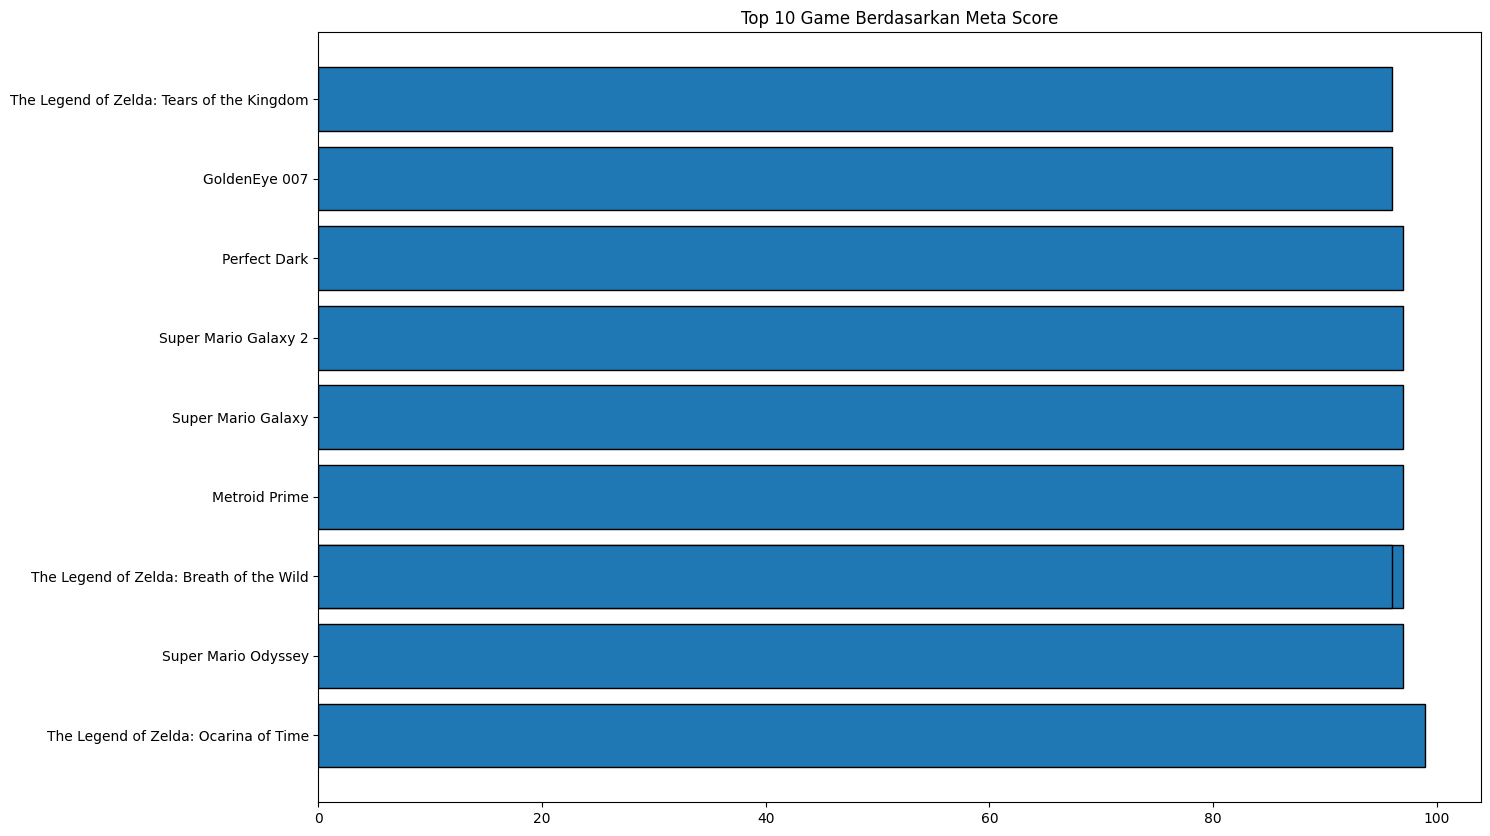

In [8]:
top_game_meta = games_df[['title', 'meta_score']].sort_values(by='meta_score', ascending=False)[:10]

plt.figure(figsize=(15,10))
plt.title('Top 10 Game Berdasarkan Meta Score')
plt.barh(top_game_meta['title'], top_game_meta['meta_score'], edgecolor='black')
plt.show()

Meta score adalah hasil dari review dari kritikus professional yang dipilih langsung oleh Metacritics, The Legend Of Zelda: Ocarina of Time mendapatkan rating yang paling tinggi.

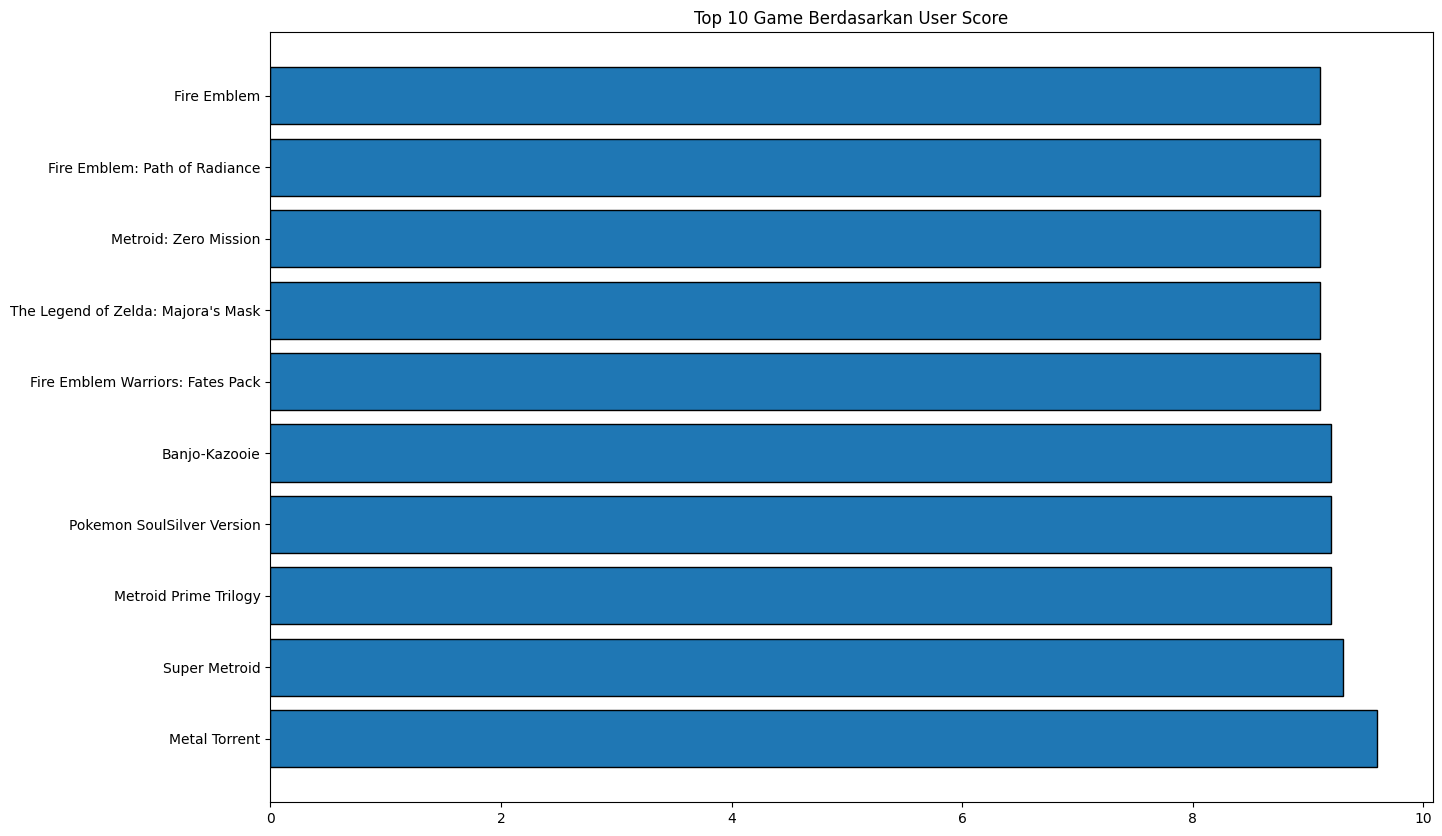

In [9]:
top_game_user = games_df[['title', 'user_score']].sort_values(by='user_score', ascending=False)[:10]

plt.figure(figsize=(15,10))
plt.title('Top 10 Game Berdasarkan User Score')
plt.barh(top_game_user['title'], top_game_user['user_score'], edgecolor='black')
plt.show()

Berdasarkan grafik diatas, Metal Torrent merupakan game yang memiliki skor tertinggi berdasarkan review dari pengguna metacritics.

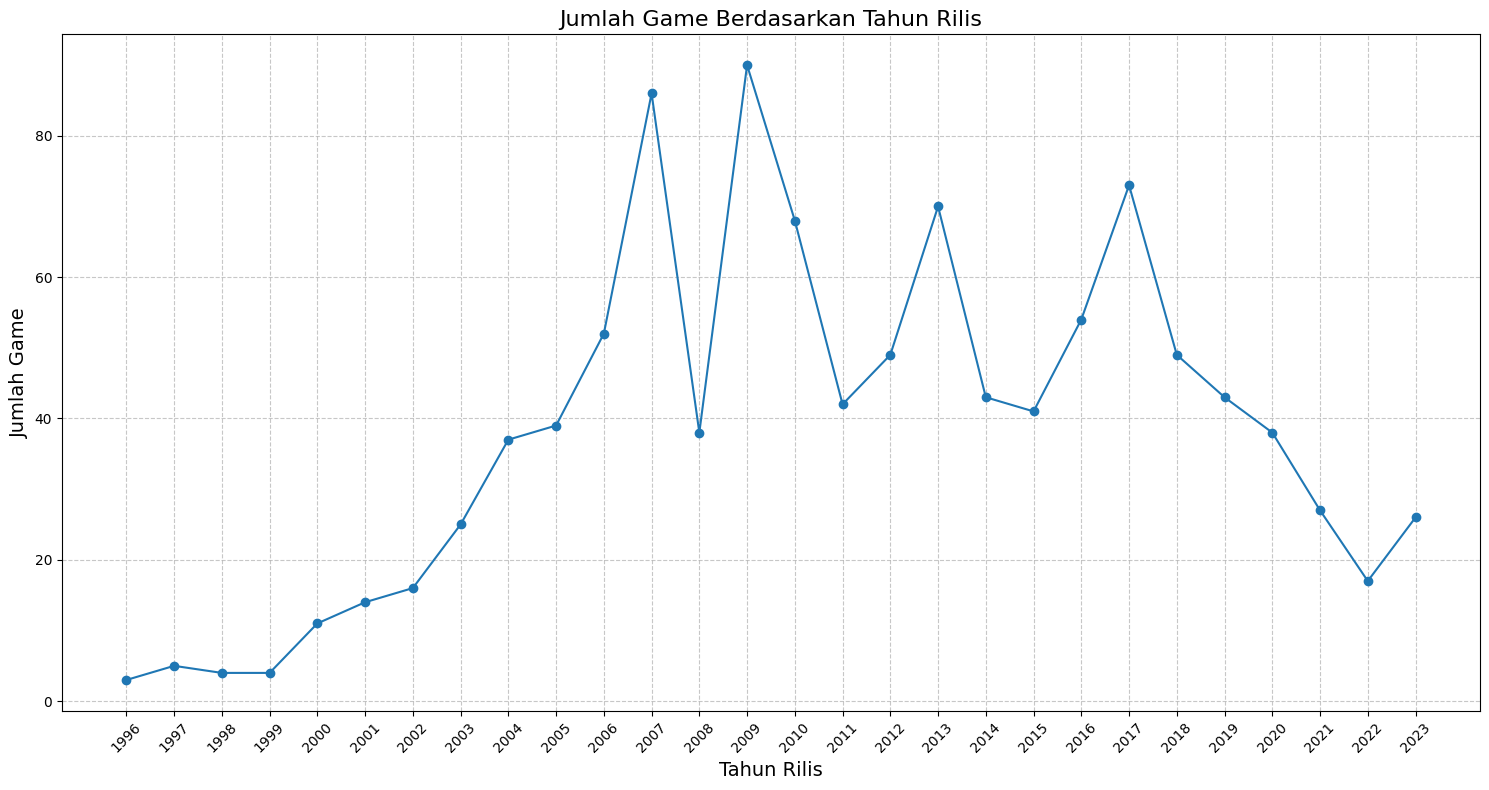

In [10]:
games_df['date'] = pd.to_datetime(games_df['date'], errors='coerce')
games_df['release_year'] = games_df['date'].dt.year

release_date_line = games_df.groupby('release_year').count()['title']

plt.figure(figsize=(15, 8))
plt.plot(release_date_line.index, release_date_line.values, marker='o')
plt.title('Jumlah Game Berdasarkan Tahun Rilis', fontsize=16)
plt.xlabel('Tahun Rilis', fontsize=14)
plt.ylabel('Jumlah Game', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(release_date_line.index, rotation=45)
plt.tight_layout()
plt.show()

Pada tahun 2009, para pengembang mencatat rekor dengan merilis total 90 game dalam satu tahun, menjadikannya tahun dengan jumlah perilisan game terbanyak. Pencapaian ini didorong oleh popularitas konsol Nintendo DS yang sedang berada di puncak kejayaannya.

# Data Preparation


Dataset ini memiliki banyak fitur yang dapat digunakan tetapi dalam proyek sistem rekomendasi sederhana ini hanya menggunakan dua kolom yaitu ```title``` dan ```genres```. Fitur yang lainnya mungkin dapat menjadi nilai tambah untuk membuat model yang lebih kompleks.



In [11]:
games_df.isna().sum()

,0
meta_score,385
title,0
platform,0
date,30
user_score,238
link,0
esrb_rating,122
developers,3
genres,0
release_year,30


Sebelum mengatasi missing value, lakukan pemilihan fitur yang relevan untuk memastikan informasi terkait game tetap terjaga.

In [12]:
selected_features = ['title', 'genres']
games_df = games_df[selected_features]

Setelah memilih fitur yang revelan, data yang memiliki missing value akan dihapus.

In [13]:
games_df.dropna(inplace=True)

<ipython-input-13-9b5788044e6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df.dropna(inplace=True)


Cek duplikasi

In [14]:
games_df.drop_duplicates(subset=['title'],inplace=True)

<ipython-input-14-49f395d7756c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df.drop_duplicates(subset=['title'],inplace=True)


Menghapus data duplikat berdasarkan kolom title pada dataframe games.

In [15]:
games_df.head(10)

,title,genres
0,Super Mario RPG,"['Role-Playing', 'Japanese-Style']"
1,WarioWare: Move It!,"['Miscellaneous', 'Party / Minigame']"
2,Super Mario Bros. Wonder,"['Action', 'Platformer', '2D']"
3,Detective Pikachu Returns,"['Adventure', '3D', 'Third-Person']"
4,Fae Farm,"['Simulation', 'Virtual', 'Virtual Life']"
5,Pikmin 4,"['Strategy', 'Real-Time', 'General']"
6,Pokemon Sleep,"['Role-Playing', 'Miscellaneous', 'Application..."
7,Mario Kart 8 Deluxe: Booster Course Pass - Wave 5,"['Racing', 'Arcade', 'Automobile']"
8,Everybody 1-2-Switch!,"['Miscellaneous', 'Party / Minigame']"
9,Pikmin 1,"['Strategy', 'Real-Time', 'General']"


# Model Development

## TF-IDF Vectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(games_df['genres'])
tfidf.get_feature_names_out()

array(['2d', '3d', 'action', 'adventure', 'alternative', 'application',
       'arcade', 'arts', 'athletics', 'automobile', 'baseball', 'based',
       'basketball', 'beat', 'board', 'boxing', 'browser', 'building',
       'card', 'career', 'city', 'civilian', 'click', 'combat',
       'compilation', 'console', 'dancing', 'defense', 'driving',
       'edutainment', 'em', 'exercise', 'fantasy', 'fi', 'fighting',
       'fitness', 'flight', 'foot', 'football', 'futuristic', 'gambling',
       'game', 'games', 'general', 'golf', 'gun', 'hardware', 'hidden',
       'historic', 'hockey', 'horizontal', 'horror', 'hunting', 'ice',
       'individual', 'japanese', 'jet', 'kart', 'life', 'light', 'linear',
       'logic', 'maker', 'marine', 'martial', 'matching', 'metroidvania',
       'military', 'minigame', 'miscellaneous', 'modern', 'motocross',
       'motorcycle', 'music', 'nature', 'novel', 'object', 'offroad',
       'olympic', 'open', 'parlor', 'party', 'person', 'pet', 'pinball',
     

In [17]:
tfidf_matrix = tfidf.transform(games_df['genres'])
tfidf_matrix.shape

(1046, 133)

In [18]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=games_df.genres
).sample(10, axis=1).sample(10, axis=0)

,world,vehicle,flight,turn,general,street,martial,dancing,adventure,logic
genres,,,,,,,,,,
"['Role-Playing', 'General', 'General']",0.0,0.0,0.0,0.000000,0.762330,0.0,0.0,0.0,0.000000,0.0
"['Action', 'Platformer', '2D']",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
"['Action', 'Rhythm', 'Music']",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
"['Action Adventure', 'Linear']",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.464319,0.0
"['Strategy', 'Turn-Based', 'Fantasy', 'Fantasy', 'Tactics']",0.0,0.0,0.0,0.353073,0.000000,0.0,0.0,0.0,0.000000,0.0
"['Action', 'General', 'Miscellaneous', 'Exercise / Fitness']",0.0,0.0,0.0,0.000000,0.275326,0.0,0.0,0.0,0.000000,0.0
"['Miscellaneous', 'Compilation']",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
"['Action', 'General']",0.0,0.0,0.0,0.000000,0.796355,0.0,0.0,0.0,0.000000,0.0


In [19]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(tfidf_matrix)
similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.10137707, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.10137707, ..., 1.        , 0.24325697,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.24325697, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [20]:
similarity_df = pd.DataFrame(
    similarity, index=games_df['title'], columns=games_df['title']
)
similarity_df.sample(10, axis=1).sample(10, axis=0)

title,Picross DS,Pokemon Ranger: Guardian Signs,ARMS: Lola Pop,Fire Emblem Heroes,Brain Age: Concentration Training,Art Style: light trax,Yoshi's New Island,The Legend of Zelda: Four Swords Anniversary Edition,Fire Emblem,Sin & Punishment: Star Successor
title,,,,,,,,,,
Yo-kai Watch Blasters: White Dog Squad,0.000000,0.000000,0.385708,0.000000,0.000000,0.000000,0.099567,0.054654,0.0,0.030438
Super Mario RPG: Legend of the Seven Stars,0.000000,0.351160,0.000000,0.263701,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Tank Troopers,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Puzzle League Express,0.618184,0.332909,0.000000,0.124998,0.048622,0.482809,0.000000,0.125529,0.0,0.069909
WarioWare: Smooth Moves,0.027200,0.000000,0.000000,0.000000,0.040836,0.073753,0.000000,0.000000,0.0,0.000000
Mario Party 2,0.076625,0.000000,0.000000,0.000000,0.115041,0.207771,0.000000,0.000000,0.0,0.000000
Pokemon Rumble U,0.000000,0.000000,0.214605,0.000000,0.000000,0.000000,0.200342,0.030409,0.0,0.016935
Super Smash Bros. Ultimate: Terry Bogard,0.000000,0.000000,0.662804,0.000000,0.000000,0.000000,0.478388,0.072612,0.0,0.040439
Punch-Out!!,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


# Evaluation

## Prediksi Rekomendasi

In [24]:
def games_recommendations(game_title, similarity_data=similarity_df, items=games_df[['title','genres']], n=5):

  if not isinstance(similarity_data, pd.DataFrame):
    raise TypeError("similarity_data harus berupa DataFrame pandas.")

  if game_title not in similarity_data.columns:
    raise ValueError(f"Game '{game_title}' tidak ditemukan di data kemiripan.")

  index = similarity_data.loc[:, game_title].to_numpy().argpartition(range(-1, -n-1, -1))

  closest = similarity_data.columns[index[-1:-(n+2):-1]]

  closest = closest.drop(game_title, errors='ignore')

  recommendations = pd.DataFrame(closest, columns=['title']).merge(items, on='title', how='left')

  return recommendations.head(n)

In [32]:
games_df[games_df.title.eq('The Legend of Zelda: Ocarina of Time')]

,title,genres
845,The Legend of Zelda: Ocarina of Time,"['Action Adventure', 'Fantasy']"


In [33]:
games_recommendations('The Legend of Zelda: Ocarina of Time')

,title,genres
0,The Legend of Zelda: Twilight Princess,"['Action Adventure', 'Fantasy']"
1,The Legend of Zelda: Four Swords Adventures,"['Action Adventure', 'Fantasy']"
2,Chibi-Robo!,"['Action Adventure', 'Fantasy']"
3,The Legend of Zelda: The Minish Cap,"['Action Adventure', 'Fantasy']"
4,The Legend of Zelda: Link's Awakening DX,"['Action Adventure', 'Fantasy']"


Sistem telah berhasil merekomendasikan top 5 game yang mirip dengan Xenoblade Chronicles, yaitu game yang memiliki genre yang sama. Genre yang sama dengan Xenoblade Chronicles adalah:
- Action Adventure
- Fantasy

## Evaluasi Model

Evaluasi model Content Based Filtering menggunakan Precision. Metrik evaluasi precision adalah metrik yang mengukur seberapa akurat model dalam memprediksi kejadian positif.

Rumus Precision:

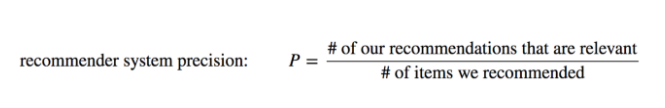

Dari hasil rekomendasi di atas, diketahui bahwa game "The Legend of Zelda: Ocarina of Time" memiliki 2 genre. Dari 5 item yang direkomendasikan, 5 item memiliki kategori 2 genre yang sama (similar). Artinya, precision sistem kita sebesar 5/5 atau sebesar 100%.

Precision = #of recommendation that are relevant/#of item we recommend.

Pada contoh rekomendasi di atas: Precision = 5/5. Jadi presisinya = 100%.